# 20211115_Titanic_Analysis

Lastest Updated: 20211121

**Import package**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Data ##

### Data selection

The data chosen is provided by Kaggle: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

The data has been split into two groups:
- train.csv: The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
- test.csv: The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Content ###

- **PassengerId** - contains random values and has no effect on the survival of passenger.
- **Survived** - contains survival result of passenger.
    - 0 = No, 1 = Yes.
- **Pclass** - a proxy for socio-economic status (SES) 
    - 1 = Upper, 2 = Middle, 3 = Lower.
- **Name** - contains passenger name.
- **Sex** - contrains passenger gender.
- **Age** - age (in years) is fractional if less than 1.
    - If the age is estimated, is it in the form of xx.5.
- **Sibsp** - number of siblings/spouses aboard the Titanic.
    - Sibling = brother, sister, stepbrother, stepsister;
    - Spouse = husband, wife (mistresses and fiancés were ignored).
- **Parch** - num of parents / children aboard the Titanic.
    - Parent = mother, father;
    - Child = daughter, son, stepdaughter, stepson;
    - Some children travelled only with a nanny, therefore parch=0 for them.
- **Ticket** - ticket number.
- **Fare** - passenger fare.
- **Cabin** - cabin number.
- **Embarked** - port of embarkation.
    - C = Cherbourg, Q = Queenstown, S = Southampton.

**Read data**

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [3]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


## Exploratory Data Analysis (EDA)

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Categorical and Numberical Values
- **Categorical Variable**: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
- **Numerical Variable**: Fare, age and passengerId

In [5]:
categorical = ['Survived', 'Sex', 'Pclass', 'Embarked', 'Cabin', 'Name', 'Ticket', 'SibSp', 'Parch']
numerical = ['Fare', 'Age', 'PassengerId']

### Data Types

In [6]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Missing values and Unique Values

In [7]:
def data_report_miss(df):
    print("-----------Missing Value Statistics-----------")
    missing_value_len = df.isnull().any().sum()
    if missing_value_len == 0:
        print("No Missing Value")
    else:
        print("Investigate Missing Value, Missing Value : " + str(missing_value_len))
        for columns in df.columns:
            num_miss = df[columns].isna().sum()
            print (columns,' has ',num_miss,' missing Values, which takes up ',"{:.2f}%".format(num_miss/len(df[columns])*100),'.')

In [8]:
data_report_miss(df_train)
print('\n -----------Unique Value Statistics-----------')
for col in categorical:
    print (df_train[col].value_counts(),'\n')

-----------Missing Value Statistics-----------
Investigate Missing Value, Missing Value : 3
PassengerId  has  0  missing Values, which takes up  0.00% .
Survived  has  0  missing Values, which takes up  0.00% .
Pclass  has  0  missing Values, which takes up  0.00% .
Name  has  0  missing Values, which takes up  0.00% .
Sex  has  0  missing Values, which takes up  0.00% .
Age  has  177  missing Values, which takes up  19.87% .
SibSp  has  0  missing Values, which takes up  0.00% .
Parch  has  0  missing Values, which takes up  0.00% .
Ticket  has  0  missing Values, which takes up  0.00% .
Fare  has  0  missing Values, which takes up  0.00% .
Cabin  has  687  missing Values, which takes up  77.10% .
Embarked  has  2  missing Values, which takes up  0.22% .

 -----------Unique Value Statistics-----------
0    549
1    342
Name: Survived, dtype: int64 

male      577
female    314
Name: Sex, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

S    644
C    168
Q     77


### Distribution Plots

<AxesSubplot:xlabel='PassengerId'>

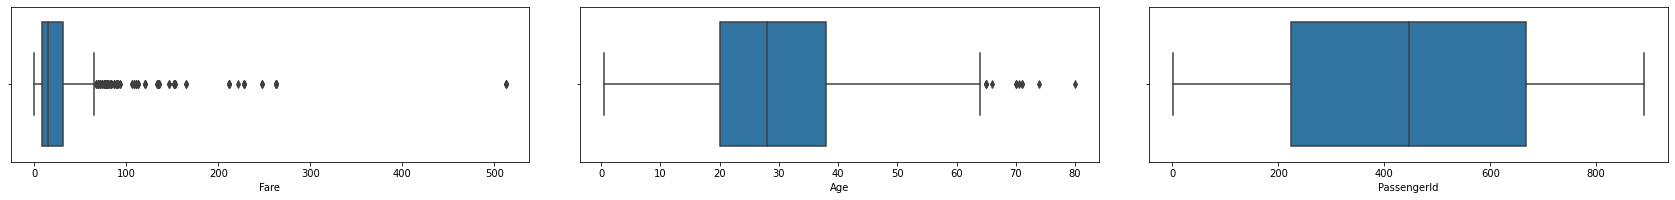

In [9]:
fig, axarr = plt.subplots(1, 3, figsize=(24, 3))
fig.tight_layout(pad=2.0)
sns.boxplot(x = numerical[0], data = df_train, ax = axarr[0])
sns.boxplot(x = numerical[1], data = df_train, ax = axarr[1])
sns.boxplot(x = numerical[2], data = df_train, ax = axarr[2])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

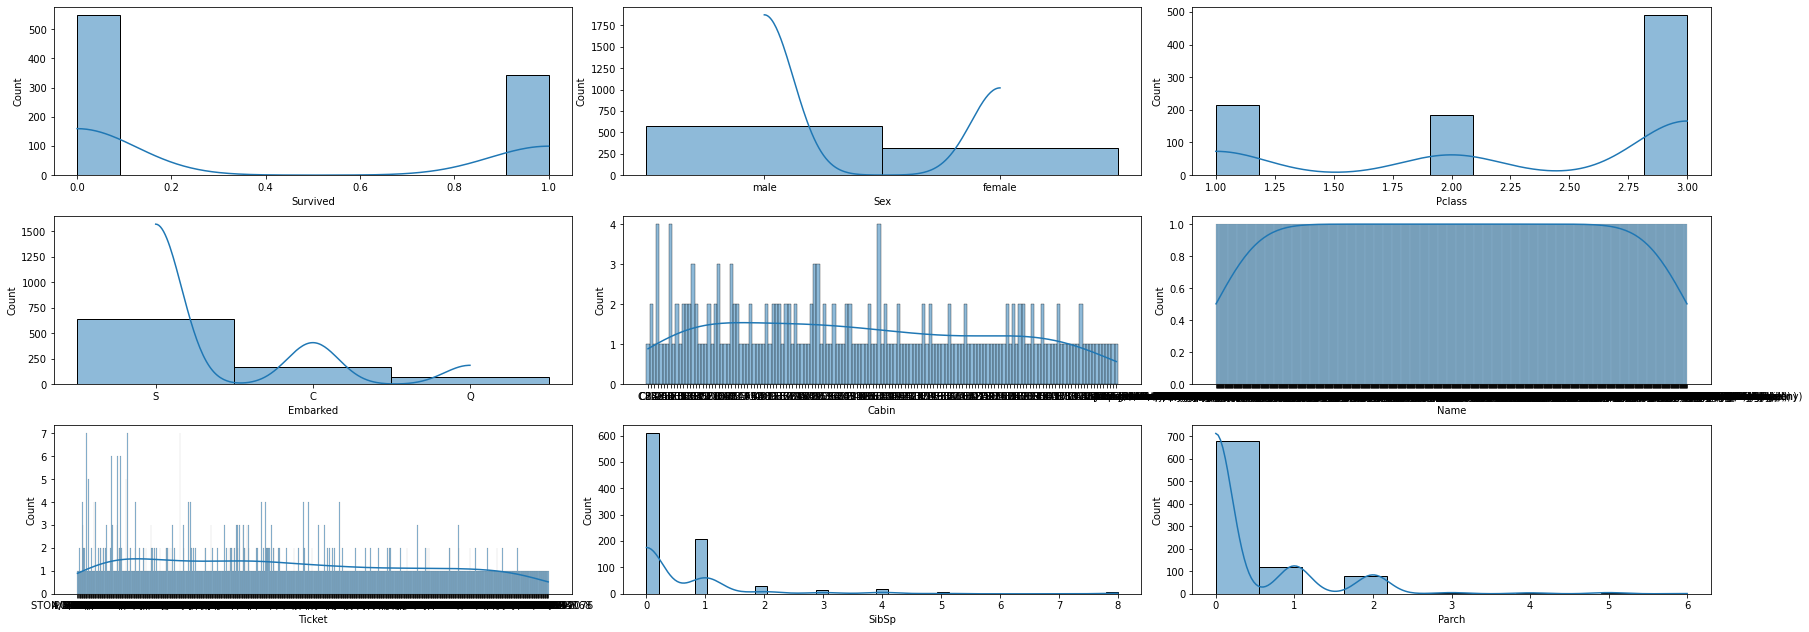

In [10]:
fig, axarr = plt.subplots(3, 3, figsize=(24, 9))
fig.tight_layout(pad=2.0)
sns.histplot(x = categorical[0], kde=True, data = df_train, ax = axarr[0][0])
sns.histplot(x = categorical[1], kde=True, data = df_train, ax = axarr[0][1])
sns.histplot(x = categorical[2], kde=True, data = df_train, ax = axarr[0][2])
sns.histplot(x = categorical[3], kde=True, data = df_train, ax = axarr[1][0])
sns.histplot(x = categorical[4], kde=True, data = df_train, ax = axarr[1][1])
sns.histplot(x = categorical[5], kde=True, data = df_train, ax = axarr[1][2])
sns.histplot(x = categorical[6], kde=True, data = df_train, ax = axarr[2][0])
sns.histplot(x = categorical[7], kde=True, data = df_train, ax = axarr[2][1])
sns.histplot(x = categorical[8], kde=True, data = df_train, ax = axarr[2][2])

### First-Stage Data Inspection

**Ticket**:
- Some Ticket values have character prefixes, and could not be considered in numerical values.
- There exists duplicates for some tickets.

**Name**:
- There exists no duplication in name value.
- Names usually contain titles which could be handled.
- Name needs to be set to string type before handling.

**Cabin**:
- Cabin has the most missing values, which take up about 77.10% of the whole values in the column.
- It is necessary to understand whether the missing values are random.
- The plot also shows that the passengers with cabin numbers are more likely to be in separate rooms.

**Pclass**:
- There are more passengers in lower class than in middle or higher class.

**Sex**:
- There are more male passagers than female passagers.

**Parch/SibSp**:
- Most passengers do not bring their families with them.

**Age**:
- Age contains values with decimal places and there exists 19.87% missing values in the age column.
- Age feature could be grouped into bins for further analysis.

**Fare**:
- The plot shows passenger fare distribution has positive skewness, which means most passengers pay low fare.
- Fare could be influenced by class and family size, thus needing to be evaluated before putting into model.

**Embarked**:
- Only two passengers do not have embarked value.

**Survived**:
- Less passengers survived in the disaster.

### EDA: Cabin

In [11]:
df_train['ifCabin'] = df_train['Cabin'].isnull().replace([True, False],[0,1])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ifCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<AxesSubplot:xlabel='ifCabin', ylabel='Age'>

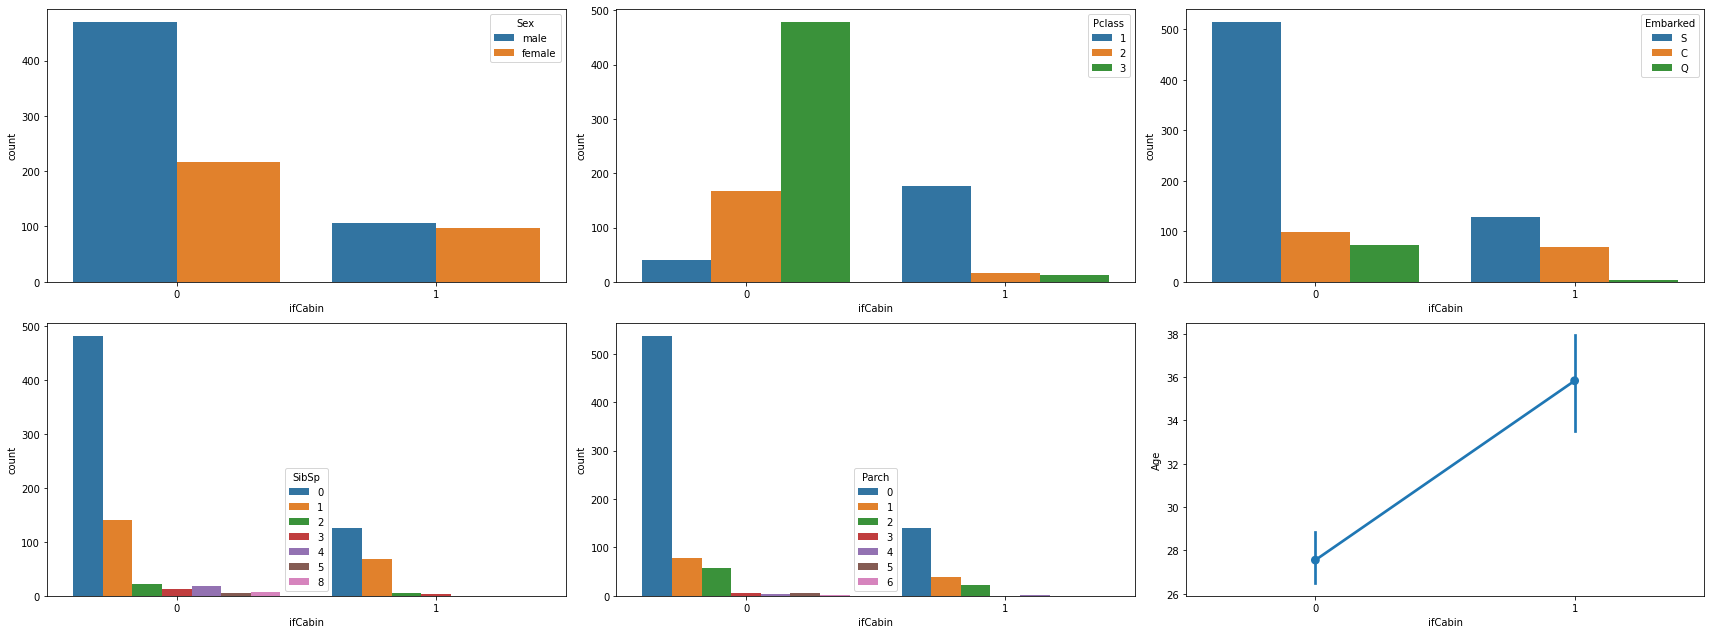

In [12]:
fig, axarr = plt.subplots(2, 3, figsize=(24, 9))
fig.tight_layout(pad=2.0)
sns.countplot(x = 'ifCabin', hue = 'Sex', data = df_train, ax = axarr[0][0])
sns.countplot(x = 'ifCabin', hue = 'Pclass', data = df_train, ax = axarr[0][1])
sns.countplot(x = 'ifCabin', hue = 'Embarked', data = df_train, ax = axarr[0][2])
sns.countplot(x = 'ifCabin', hue = 'SibSp', data = df_train, ax = axarr[1][0])
sns.countplot(x = 'ifCabin', hue = 'Parch', data = df_train, ax = axarr[1][1])
sns.pointplot(x = 'ifCabin', y = 'Age', data = df_train, ax = axarr[1][2])

- SibSp, Parch, Embarked and Sex does not show clear relation with Cabin validity.
- It seems that passengers with higher Age have a Cabin.
- Most passengers who have cabins are in higher class.

<AxesSubplot:xlabel='ifCabin', ylabel='Survived'>

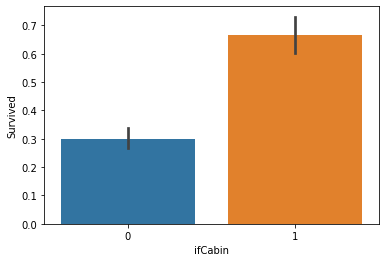

In [13]:
sns.barplot(x = 'ifCabin',y = 'Survived',data = df_train)

- Passengers who have cabinhave higher survival rate.

### EDA: Sex

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

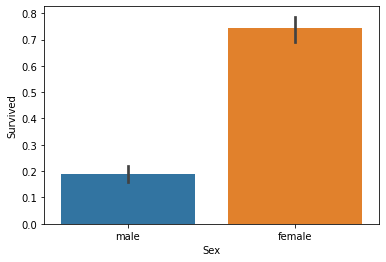

In [14]:
sns.barplot(x="Sex",y="Survived",data=df_train)

- Female passengers have higher survival rate.

### EDA: Title

In [15]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    print (big_string)
    return np.nan

In [16]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [17]:
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev','Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess','Don', 'Jonkheer']
df_train['Title'] = df_train['Name'].map(lambda x: substrings_in_string(x, title_list))
df_train['Title']= df_train.apply(replace_titles, axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ifCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


<AxesSubplot:xlabel='Title', ylabel='Survived'>

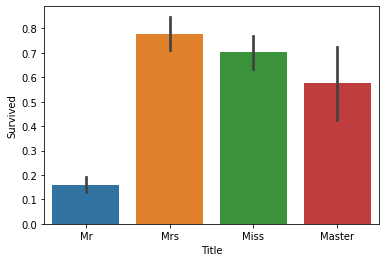

In [18]:
sns.barplot(x="Title",y="Survived",data=df_train)

- Also shows female has higher survival rate than male.

### EDA: Family Size

In [19]:
df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ifCabin,Title,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0


<AxesSubplot:xlabel='Family_Size', ylabel='Survived'>

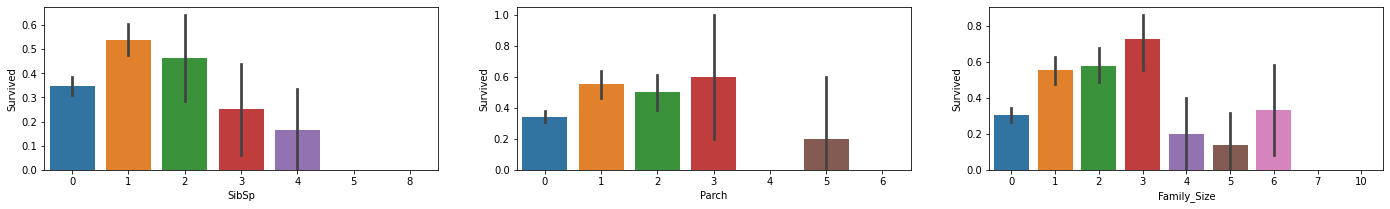

In [20]:
fig, axarr = plt.subplots(1, 3, figsize=(24, 3))
sns.barplot(x='SibSp',y="Survived",data=df_train, ax = axarr[0])
sns.barplot(x='Parch',y="Survived",data=df_train, ax = axarr[1])
sns.barplot(x="Family_Size",y="Survived", data=df_train, ax = axarr[2])

- Family size between 1~3 has higher survival rate.

### EDA: Age

In [21]:
print ('The max age is ',max(df_train.Age.dropna()), ' and the min age is ', min(df_train.Age.dropna()))

The max age is  80.0  and the min age is  0.42


In [22]:
df_train['Age_Group'] = pd.cut(df_train['Age'].dropna(), np.linspace(0, 80, 21), include_lowest=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ifCabin,Title,Family_Size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,1,"(20.0, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,"(36.0, 40.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,1,"(32.0, 36.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0,"(32.0, 36.0]"


<AxesSubplot:xlabel='Age_Group', ylabel='Survived'>

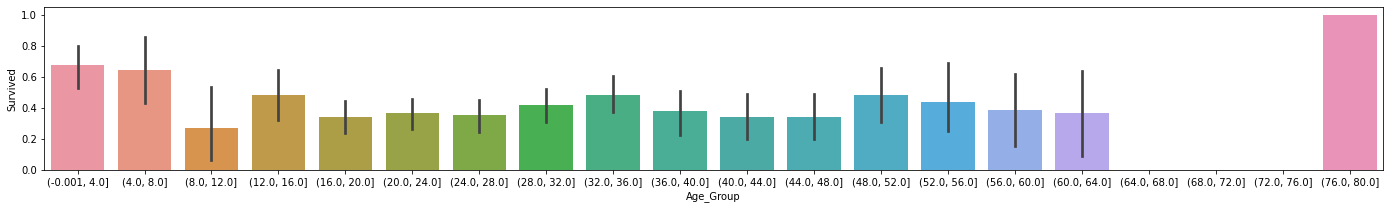

In [23]:
fig, axarr = plt.subplots(figsize=(24, 3))
sns.barplot(x="Age_Group",y="Survived",data=df_train)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


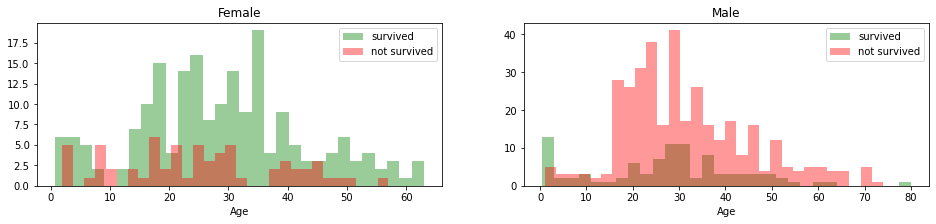

In [24]:
fig, axarr = plt.subplots(1, 2,figsize=(16, 3))
women = df_train[df_train['Sex'] == 'female']
men = df_train[df_train['Sex'] == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=30, label = 'survived', ax = axarr[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=30, label = 'not survived', ax = axarr[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=30, label = 'survived', ax = axarr[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=30, label = 'not survived', ax = axarr[1], kde = False, color="red")
ax.legend()
title_male = ax.set_title('Male')

- Age only does not directly show relation with with survival rate.
- It seems that there exists large proportion of very young (age between 20-40) males and females survived.

### EDA: Fare per Person

In [25]:
df_train['Fare_Per_Person'] = df_train['Fare'] / (df_train['Family_Size'] + 1)
print ('The max Fare is ',max(df_train.Fare), ' and the min Fare is ', min(df_train.Fare))
print ('The max Fare_Per_Person is ',max(df_train.Fare_Per_Person), ' and the min Fare_Per_Person is ', min(df_train.Fare_Per_Person))
df_train.head()

The max Fare is  512.3292  and the min Fare is  0.0
The max Fare_Per_Person is  512.3292  and the min Fare_Per_Person is  0.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ifCabin,Title,Family_Size,Age_Group,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,1,"(20.0, 24.0]",3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,"(36.0, 40.0]",35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0,"(24.0, 28.0]",7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,1,"(32.0, 36.0]",26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0,"(32.0, 36.0]",8.05000


<AxesSubplot:xlabel='FarePP_Group', ylabel='Survived'>

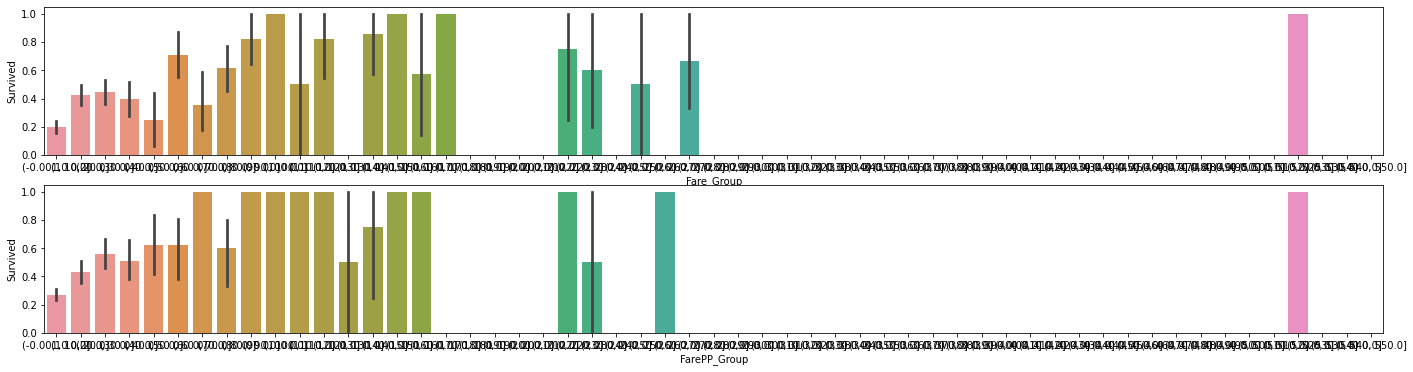

In [26]:
df_train['Fare_Group'] = pd.cut(df_train['Fare'].dropna(), np.linspace(0, 550, 56), include_lowest=True)
df_train['FarePP_Group'] = pd.cut(df_train['Fare_Per_Person'].dropna(), np.linspace(0, 550, 56), include_lowest=True)
fig, axarr = plt.subplots(2, figsize=(24, 6))
sns.barplot(x = 'Fare_Group',y = "Survived", data = df_train, ax = axarr[0])
sns.barplot(x = 'FarePP_Group',y = "Survived", data = df_train, ax = axarr[1])

- Fare does not vary much with family size.

## Feature Engineering

In [27]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")

df_train['ifCabin'] = df_train['Cabin'].isnull().replace([True, False],[0,1])
df_test['ifCabin'] = df_test['Cabin'].isnull().replace([True, False],[0,1])

df_train['Gender'] = pd.get_dummies(df_train['Sex'], drop_first=True)
df_test['Gender'] = pd.get_dummies(df_test['Sex'], drop_first=True)

df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch']

df_train.drop(columns=['Sex', 'Embarked', 'Fare', 'SibSp', 'Parch', 'Name', 'PassengerId', 'Cabin', 'Ticket', 'Age'], inplace=True)
df_test.drop(columns=['Sex', 'Embarked', 'Fare', 'SibSp', 'Parch', 'Name', 'PassengerId', 'Cabin', 'Ticket', 'Age'], inplace=True)

df_train.head()

,Survived,Pclass,ifCabin,Gender,Family_Size
0,0,3,0,1,1
1,1,1,1,0,1
2,1,3,0,0,0
3,1,1,1,0,1
4,0,3,0,1,0


## Modeling

In [28]:
X_train = df_train.drop(columns='Survived')
Y_train = df_train['Survived'].astype(int)
X_test = df_test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
linear_regr = LinearRegression().fit(X_train, Y_train)
print ('Score given test set: %.2f' % linear_regr.score(X_train, Y_train))
pred = linear_regr.predict(X_test)

Score given test set: 0.38


In [30]:
logistic_regr = LogisticRegression(random_state=0).fit(X_train, Y_train)
print ('Score given test set: %.2f' % logistic_regr.score(X_train, Y_train))
pred = logistic_regr.predict(X_test)
pred

Score given test set: 0.80


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,